In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\mk-bk-mixed-probabilities
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\mk-bk-mixed-probabilities
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:
# hoe vaak komt mk-rattler voor??

import tables
base = "E:/PhD rearrangements/auto/"
summ = tables.File(base + "h5/shear_summary_cache.h5").root.data.read()

dataN = summ["N"]
datalP = around(log10(summ["P"]),2)

print "Total # of packings: ", len(summ)

# (1.1) pressure
mask = (datalP >= -7) * (datalP <= -1.5)
print "After (1.1): ", len(summ[mask])

# (1.2) convergence initial packing
mask *= (abs(summ["sxy_base"]) < 1e-15)
print "After (1.2): ", len(summ[mask])

# (1.3) convergence initial packing
mask *= (abs(summ["maxGrad_base"] / summ["P"]) < 1e-8)
print "After (1.3): ", len(summ[mask])

summ = summ[mask]
dataN = summ["N"]
datalP = around(log10(summ["P"]),2)

entries = []

sdata = summ
mk_normal = np.sum((sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] == sdata["Neff_min"]))
mk_rattler = np.sum((sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] > sdata["Neff_min"]))

print mk_rattler / (mk_normal + mk_rattler)

Ns = np.unique(dataN)
lPs = np.unique(datalP)
for N in Ns:
  for lP in lPs:
    mask = (datalP == lP) * (dataN == N)
    sdata = summ[mask]
    
    P = 10**lP
    
    mk_normal = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] == sdata["Neff_min"])
    mk_rattler = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] > sdata["Neff_min"])
    bk_single = (sdata["N-_plus"] == 1) * (sdata["N+_plus"] == 0)
    bk_multi = (sdata["N-_plus"] > 1) * (sdata["N+_plus"] == 0)
    
    mx = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] > 0)
    
    all = np.sum(mask)
    
    entries.append((P, all, np.sum(mk_normal), np.sum(mk_rattler), np.sum(bk_single), np.sum(bk_multi), np.sum(mx)))
    

Ps, nums, mk_normals, mk_rattlers, bk_singles, bk_multis, mxs = np.array(entries).T

from __future__ import division
fracs = mk_rattlers / (mk_normals + mk_rattlers)

In [10]:
# we willen een andere set filters hier gebruiken: mixed mag wél, maar alleen N=256

import tables
base = "E:/PhD rearrangements/auto/"
summ = tables.File(base + "h5/shear_summary_cache.h5").root.data.read()

dataN = summ["N"]
datalP = around(log10(summ["P"]),2)

print "Total # of packings: ", len(summ)

# (1.1) pressure
mask = (datalP >= -7) * (datalP <= -1.5)
print "After (1.1): ", len(summ[mask])

# (1.2) convergence initial packing
mask *= (abs(summ["sxy_base"]) < 1e-15)
print "After (1.2): ", len(summ[mask])

# (1.3) convergence initial packing
mask *= (abs(summ["maxGrad_base"] / summ["P"]) < 1e-8)
print "After (1.3): ", len(summ[mask])

mask *= (dataN == 256)

summ = summ[mask]
dataN = summ["N"]
datalP = around(log10(summ["P"]),2)

Total # of packings:  83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146


In [11]:
lPs = np.unique(datalP)

entries = []

for lP in lPs:
    mask = datalP == lP
    sdata = summ[mask]
    
    P = 10**lP
    
    mk_normal = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] == sdata["Neff_min"])
    mk_rattler = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] == 0) * (sdata["Neff_plus"] > sdata["Neff_min"])
    bk_single = (sdata["N-_plus"] == 1) * (sdata["N+_plus"] == 0)
    bk_multi = (sdata["N-_plus"] > 1) * (sdata["N+_plus"] == 0)
    
    mx = (sdata["N+_plus"] > 0) * (sdata["N-_plus"] > 0)
    
    all = np.sum(mask)
    
    entries.append((P, all, np.sum(mk_normal), np.sum(mk_rattler), np.sum(bk_single), np.sum(bk_multi), np.sum(mx)))
    

Ps, nums, mk_normals, mk_rattlers, bk_singles, bk_multis, mxs = np.array(entries).T

bks = bk_singles + bk_multis



In [23]:
print (mk_normals/nums)[-1]
print (mk_rattlers/nums)[-1]
print ((mk_normals+mk_rattlers)/nums)[-1]

print (bk_singles/nums)[-1]
print (bk_multis/nums)[-1]
print (bks/nums)[-1]
print (mxs/nums)[-1]

0.356356356356
0.024024024024
0.38038038038
0.543543543544
0.045045045045
0.588588588589
0.031031031031


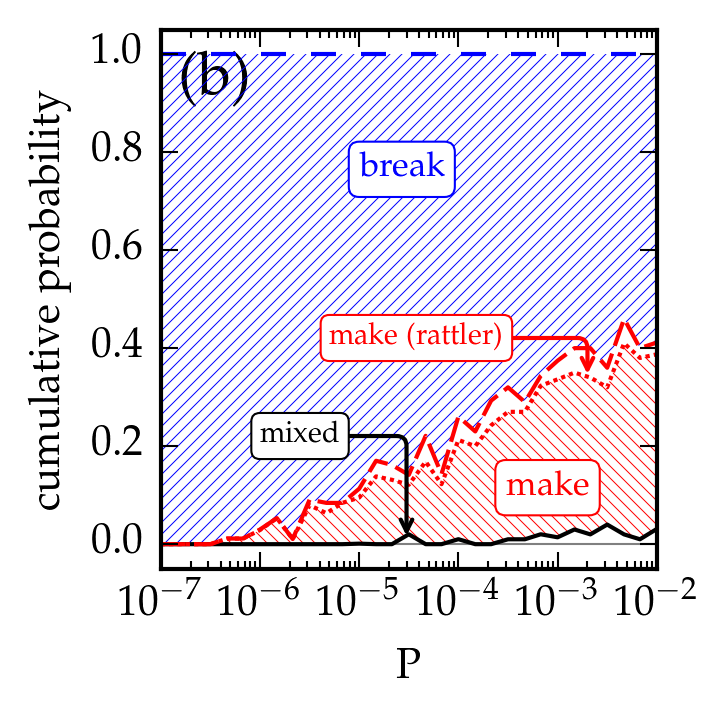

In [171]:
halffig()

def plotprobs(Ps, allnum, nums, previous, **kwargs):
    probs = nums/allnum
    sigma = sqrt(allnum * probs * (1-probs))/allnum
    
    if previous is not None:
        data = probs+previous
    else:
        data = probs
        
    plt.plot(Ps, data, **kwargs)
    return data

p = None
p0 = 0

plt.plot([1e-8,1e-1], [0,0], 'gray', lw=0.5)

p = plotprobs(Ps, nums, mxs, p, color='black', label='mixed')

p0 = p
p = plotprobs(Ps, nums, mk_normals, p, color='red', dashes=(1,1), label='make')
plt.fill_between(Ps, p0, p, hatch='\\\\', color='none', edgecolor="red", lw=0) #(1,0.8,0.8))

p0 = p
p = plotprobs(Ps, nums, mk_rattlers, p, color='red', dashes=(6,2), label='make (rattler)')

p0 = p
p = plotprobs(Ps, nums, bks, p, color='blue', linestyle='--', label='break')
plt.fill_between(Ps, p0, p, hatch='//', color='none', edgecolor="blue", lw=0)

#plt.legend(loc='upper left', fontsize='x-small', frameon=False, borderaxespad=1)

plt.text(1e-5,0.8,'break', color='blue', fontsize='small', verticalalignment='top',
        bbox={'color': 'white', 'boxstyle': 'round', 'ec': 'blue', 'lw': 0.5})

plt.annotate('make (rattler)', (2e-3, 0.33), (5e-6, 0.45),
             verticalalignment='top',
             color='red', fontsize='x-small',
             arrowprops={'arrowstyle': '->', 'connectionstyle': 'angle,angleA=180,angleB=90,rad=10', 'ec': 'red'},
             bbox={'color': 'white', 'boxstyle': 'round', 'ec': 'red', 'lw': 0.5})

plt.text(3e-4, 0.1, 'make', color='red', fontsize='small', bbox={'color': 'white', 'boxstyle': 'round', 'ec': 'red', 'lw': 0.5})

plt.annotate('mixed', (3e-5, 0), (1e-6, 0.25),
             verticalalignment='top',
             color='black', fontsize='x-small',
             arrowprops={'arrowstyle': '->', 'connectionstyle': 'angle,angleA=180,angleB=90,rad=10', 'ec': 'black'},
             bbox={'color': 'white', 'boxstyle': 'round', 'ec': 'black', 'lw': 0.5})

plt.semilogx()
plt.axis(ymin=-0.1, ymax=1.1)
plt.xlabel("P")
plt.ylabel(r"cumulative probability")
plt.axis(xmin=1e-7, xmax=1e-2, ymin=-0.05, ymax=1.05)

plt.text(0.04,0.96, r'(b)',
            transform=plt.gca().transAxes,
            verticalalignment='top',
            horizontalalignment='left',
            size='x-large',
            zorder=-1,
)

plt.savefig('cumprob-types.pdf')